In [2]:
# loaded the required Libraries 

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [6]:
# loadding the data 


data = pd.read_csv('C:/Users/Dinesh/OneDrive/Desktop/Data Science/Meachine Learning/M.L Projects/Working on Text Data/Data/email_data.csv')
data.drop(columns='Unnamed: 0',inplace = True) # deleted the unwanted column
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


In [9]:
data.shape

(5171, 3)

### Exploratory Data Analysis

In [11]:
data['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [15]:
data['label'].value_counts(normalize = True)*100 # % of each element

ham     71.01141
spam    28.98859
Name: label, dtype: float64

<AxesSubplot:xlabel='label', ylabel='count'>

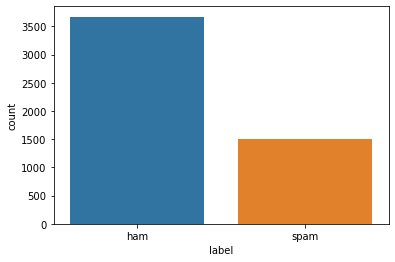

In [16]:
sns.countplot(x= 'label',data = data)

### Data Preparation

In [17]:
# splitiing data into train and test set

In [26]:
y = data['label'] # target variable
x = data[['text']] # input data 

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state= 143)


In [29]:
x_train.head()

,text
4116,Subject: a computer and internet connection fo...
3716,"Subject: hpl nom for march 16 , 2001\n( see at..."
1252,Subject: 23 rd noms\n- - - - - - - - - - - - -...
1861,Subject: dear customer your details have been ...
2570,Subject: . inc ; rease * ; * d . ic - k l * en...


In [30]:
x_train.shape

(4136, 1)

## Data Preparation -- Text Preprocessing 

In [47]:
import re
import nltk # library for text processing 
from nltk.tokenize import word_tokenize # for token cleaning 
from nltk.corpus import stopwords # to remove stopwords
from nltk.stem import PorterStemmer # stemming for cleaning 
from nltk.stem import WordNetLemmatizer # Lemmitation for cleaning 


In [48]:
# initalise the inbuilt stemmer 

stemmer = PorterStemmer()

# we can also apply lemmitation to clean the data 

lemmatizer = WordNetLemmatizer()

In [49]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [33]:
# pip install tqdm (install for the first time )

Note: you may need to restart the kernel to use updated packages.


In [36]:
from tqdm import tqdm , tqdm_notebook

In [37]:
tqdm.pandas()

In [39]:
temp_df = x_train['text'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 4136/4136 [02:14<00:00, 30.71it/s]


,0,1
4116,subject comput internet connect famili know te...,245
3716,subject hpl nom march see attach file hplno xl...,11
1252,subject rd nom forward ami chokshi corp enron ...,35
1861,subject dear custom detail compromis dear cust...,106
2570,subject inc reas ic k l engt h kslkbkcrbavoc l...,27


In [40]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
4116,subject comput internet connect famili know te...,245
3716,subject hpl nom march see attach file hplno xl...,11
1252,subject rd nom forward ami chokshi corp enron ...,35
1861,subject dear custom detail compromis dear cust...,106
2570,subject inc reas ic k l engt h kslkbkcrbavoc l...,27


In [41]:
x_train = pd.concat([x_train, temp_df], axis=1)

x_train.head()

,text,clean_text_stem,text_length_stem
4116,Subject: a computer and internet connection fo...,subject comput internet connect famili know te...,245
3716,"Subject: hpl nom for march 16 , 2001\n( see at...",subject hpl nom march see attach file hplno xl...,11
1252,Subject: 23 rd noms\n- - - - - - - - - - - - -...,subject rd nom forward ami chokshi corp enron ...,35
1861,Subject: dear customer your details have been ...,subject dear custom detail compromis dear cust...,106
2570,Subject: . inc ; rease * ; * d . ic - k l * en...,subject inc reas ic k l engt h kslkbkcrbavoc l...,27


In [50]:
temp_df = x_train['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 4136/4136 [02:34<00:00, 26.80it/s]


,0,1
4116,subject computer internet connection family kn...,245
3716,subject hpl nom march see attached file hplno ...,11
1252,subject rd noms forwarded ami chokshi corp enr...,35
1861,subject dear customer detail compromised dear ...,106
2570,subject inc rease ic k l engt h kslkbkcrbavoc ...,27


In [51]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
4116,subject computer internet connection family kn...,245
3716,subject hpl nom march see attached file hplno ...,11
1252,subject rd noms forwarded ami chokshi corp enr...,35
1861,subject dear customer detail compromised dear ...,106
2570,subject inc rease ic k l engt h kslkbkcrbavoc ...,27


In [52]:
x_train = pd.concat([x_train, temp_df], axis=1)

x_train.head()


,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
4116,Subject: a computer and internet connection fo...,subject comput internet connect famili know te...,245,subject computer internet connection family kn...,245
3716,"Subject: hpl nom for march 16 , 2001\n( see at...",subject hpl nom march see attach file hplno xl...,11,subject hpl nom march see attached file hplno ...,11
1252,Subject: 23 rd noms\n- - - - - - - - - - - - -...,subject rd nom forward ami chokshi corp enron ...,35,subject rd noms forwarded ami chokshi corp enr...,35
1861,Subject: dear customer your details have been ...,subject dear custom detail compromis dear cust...,106,subject dear customer detail compromised dear ...,106
2570,Subject: . inc ; rease * ; * d . ic - k l * en...,subject inc reas ic k l engt h kslkbkcrbavoc l...,27,subject inc rease ic k l engt h kslkbkcrbavoc ...,27


## Create the WordCloud

In [54]:
# pip install wordcloud(Required only for the first time)

In [55]:
from wordcloud import WordCloud

In [56]:
y_train

4116     ham
3716     ham
1252     ham
1861    spam
2570    spam
        ... 
162     spam
545      ham
1553     ham
2201     ham
590     spam
Name: label, Length: 4136, dtype: object

In [65]:
## separating the Spam data present in the y_train

In [58]:
spam_df  = x_train.loc[y_train == 'spam',: ]
spam_df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
1861,Subject: dear customer your details have been ...,subject dear custom detail compromis dear cust...,106,subject dear customer detail compromised dear ...,106
2570,Subject: . inc ; rease * ; * d . ic - k l * en...,subject inc reas ic k l engt h kslkbkcrbavoc l...,27,subject inc rease ic k l engt h kslkbkcrbavoc ...,27
4198,"Subject: make your computer like new , remove ...",subject make comput like new remov spywar home...,54,subject make computer like new remove spyware ...,54
296,Subject: \n,subject,1,subject,1
4766,Subject: rock solid\ndiscount drugs . . . save...,subject rock solid discount drug save everi or...,124,subject rock solid discount drug save every or...,124


In [59]:
words = ' '.join(spam_df['clean_text_lemma'])

print(words[:100])

subject dear customer detail compromised dear customer recently large number cyber attack pointing d


In [62]:
cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])


In [63]:

spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

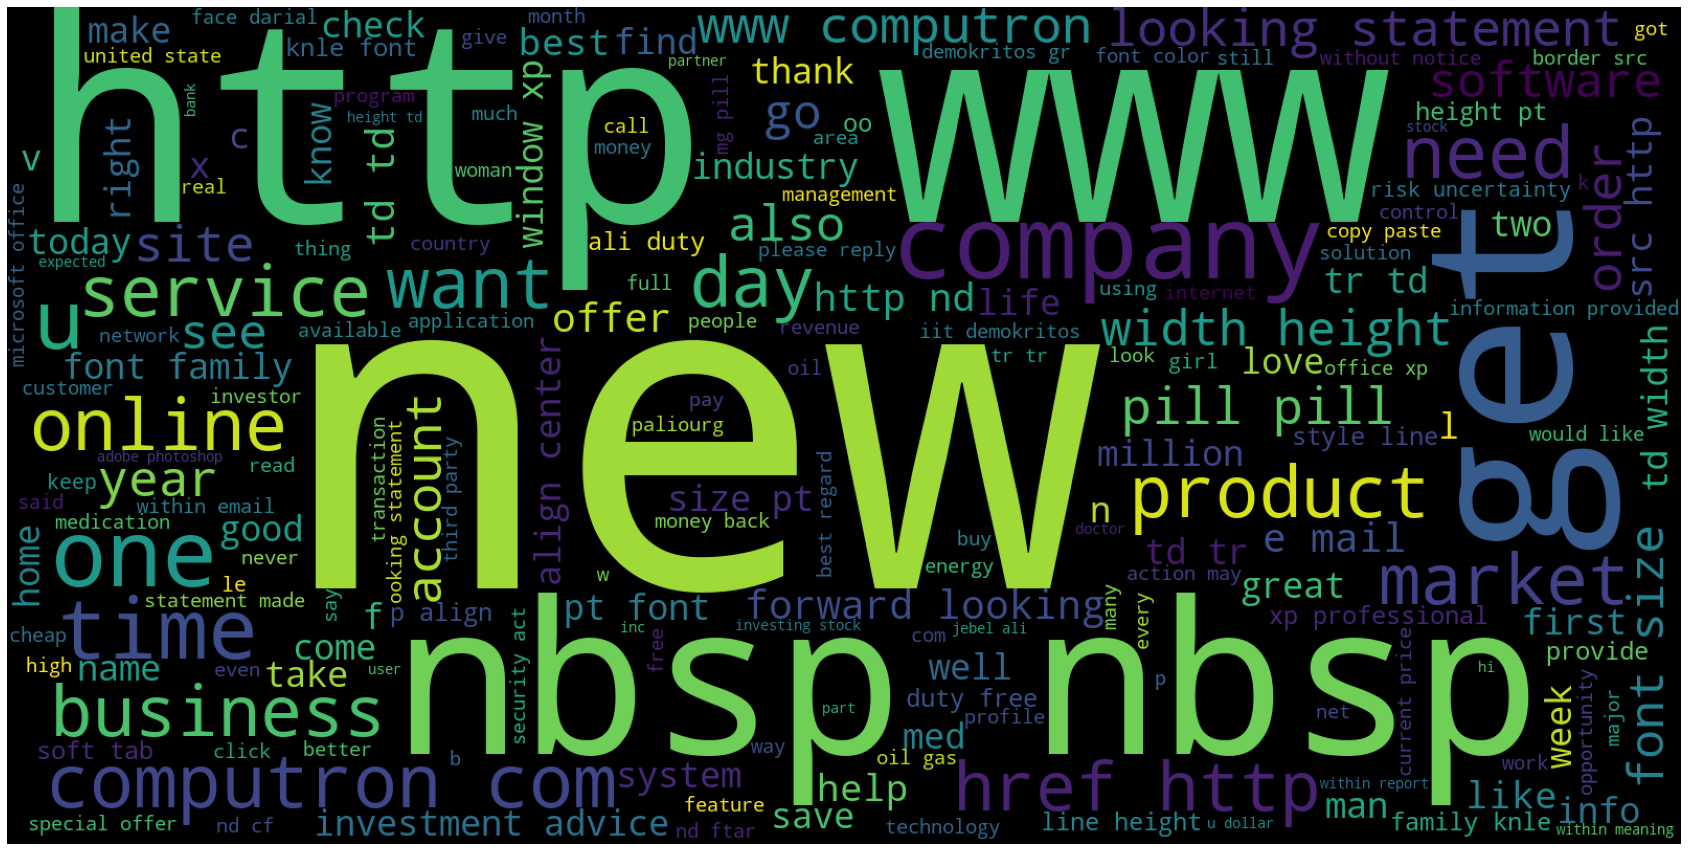

In [64]:
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()


In [66]:
# hamm Data in Y_train

In [68]:
ham_df = x_train.loc[y_train=='ham', :]

words = ' '.join(ham_df['clean_text_lemma'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])


In [69]:
ham_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)


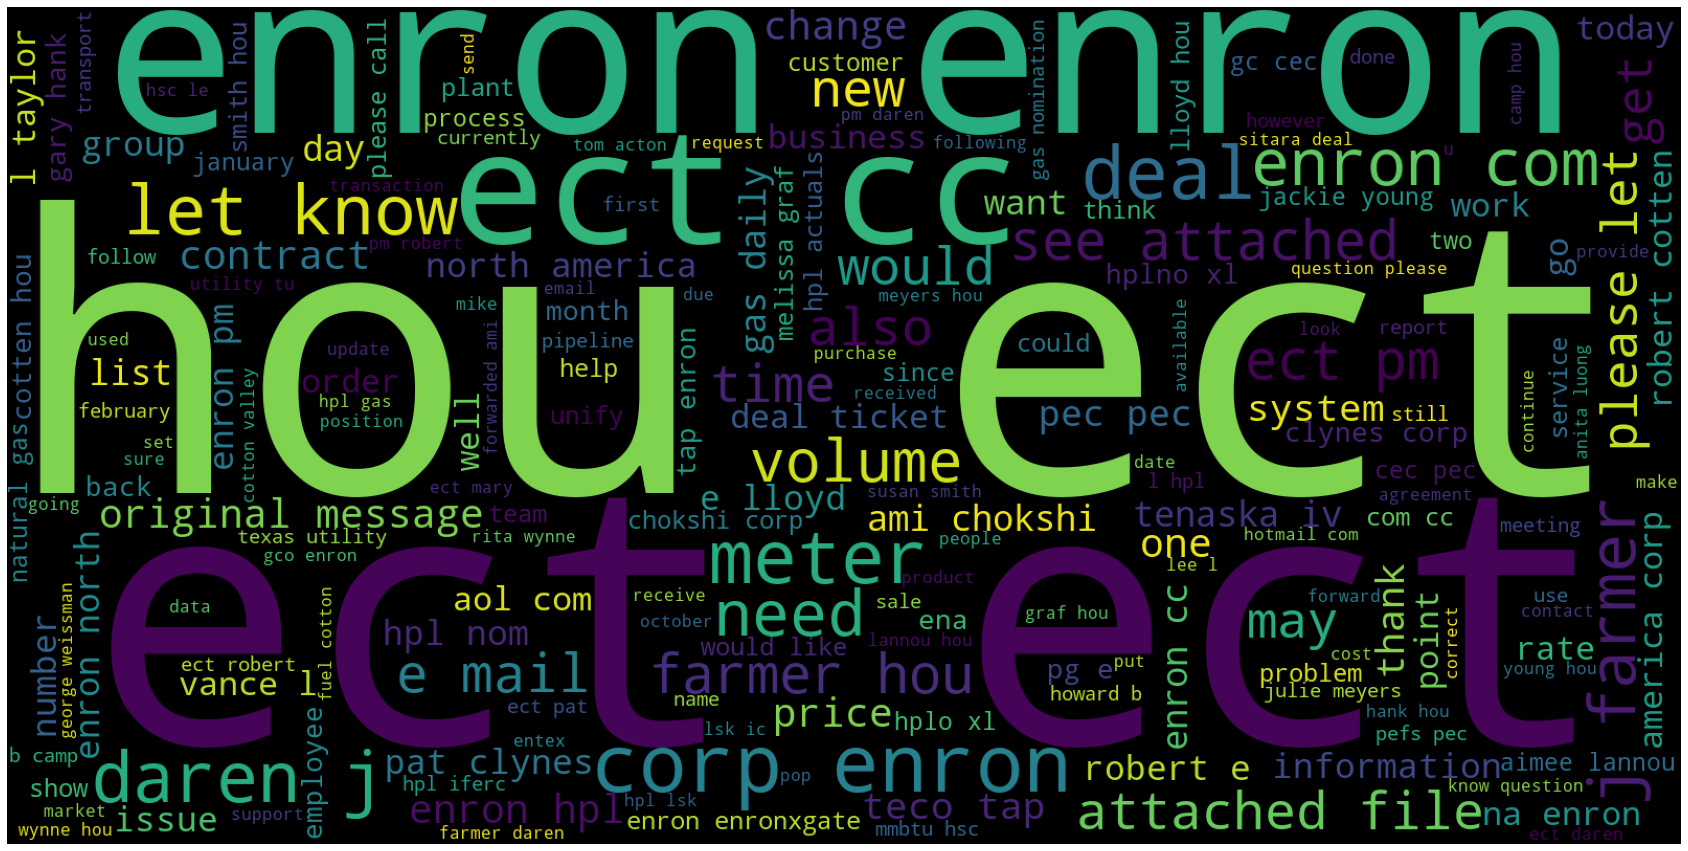

In [70]:
plt.figure(1,figsize=(30,20))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.show()

## Converting Text to Numeric Vectors - BOW Representation 

- **step - 1** :- Lean the vocabulary from the text data
- **step - 2** :- Transform the train['emails'] to x_train
- **step - 3** :- Transform the test['emails'] to x_test 

In [71]:
x_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
4116,Subject: a computer and internet connection fo...,subject comput internet connect famili know te...,245,subject computer internet connection family kn...,245
3716,"Subject: hpl nom for march 16 , 2001\n( see at...",subject hpl nom march see attach file hplno xl...,11,subject hpl nom march see attached file hplno ...,11
1252,Subject: 23 rd noms\n- - - - - - - - - - - - -...,subject rd nom forward ami chokshi corp enron ...,35,subject rd noms forwarded ami chokshi corp enr...,35
1861,Subject: dear customer your details have been ...,subject dear custom detail compromis dear cust...,106,subject dear customer detail compromised dear ...,106
2570,Subject: . inc ; rease * ; * d . ic - k l * en...,subject inc reas ic k l engt h kslkbkcrbavoc l...,27,subject inc rease ic k l engt h kslkbkcrbavoc ...,27


In [74]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

x_train_bow = vocab.fit_transform(x_train['clean_text_lemma'])
x_train_bow

<4136x38915 sparse matrix of type '<class 'numpy.int64'>'
	with 250671 stored elements in Compressed Sparse Row format>

In [75]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(x_train_bow))

print("Shape of input data:", x_train_bow.shape)


Total unique words: 38915
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (4136, 38915)


In [76]:
print(x_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [79]:
from sys import getsizeof

print(type(x_train_bow))
print(getsizeof(x_train_bow), "Bytes")
print(type(x_train_bow.toarray()))
print(getsizeof(x_train_bow.toarray()), "Bytes")

<class 'scipy.sparse.csr.csr_matrix'>
48 Bytes
<class 'numpy.ndarray'>
1287619640 Bytes


## Preprocessing the Test Data

In [80]:
x_test.head()

,text
2606,"Subject: meter 980070\ndaren ,\nthis meter has..."
1733,Subject: want to lose up to 19 % weight . try ...
4526,Subject: free mortgage quotes\nyou want to fre...
2148,Subject: shut - in of meter 0984179 hoff helle...
711,Subject: lose it\nos effetiveeight os aaiabe w...


In [81]:
temp_df = x_test['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 1035/1035 [00:31<00:00, 32.37it/s]


,0,1
2606,subject meter daren meter recorded flow follow...,20
1733,subject want lose weight try adipren hello spe...,70
4526,subject free mortgage quote want free debt u e...,15
2148,subject shut meter hoff heller unit cdp meter ...,44
711,subject lose o effetiveeight o aaiabe withoutr...,9


In [82]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
2606,subject meter daren meter recorded flow follow...,20
1733,subject want lose weight try adipren hello spe...,70
4526,subject free mortgage quote want free debt u e...,15
2148,subject shut meter hoff heller unit cdp meter ...,44
711,subject lose o effetiveeight o aaiabe withoutr...,9


In [83]:
x_test = pd.concat([x_test, temp_df], axis=1)

x_test.head()



,text,clean_text_lemma,text_length_lemma
2606,"Subject: meter 980070\ndaren ,\nthis meter has...",subject meter daren meter recorded flow follow...,20
1733,Subject: want to lose up to 19 % weight . try ...,subject want lose weight try adipren hello spe...,70
4526,Subject: free mortgage quotes\nyou want to fre...,subject free mortgage quote want free debt u e...,15
2148,Subject: shut - in of meter 0984179 hoff helle...,subject shut meter hoff heller unit cdp meter ...,44
711,Subject: lose it\nos effetiveeight os aaiabe w...,subject lose o effetiveeight o aaiabe withoutr...,9


In [86]:
x_test_bow = vocab.transform(x_test['clean_text_lemma'])
x_test_bow

<1035x38915 sparse matrix of type '<class 'numpy.int64'>'
	with 58511 stored elements in Compressed Sparse Row format>

# Applying Algorithms

### Logistic Regression 

In [88]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_bow, y_train)

LogisticRegression()

In [95]:
y_test_pred_lg= classifier.predict(x_test_bow)


In [107]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred_lg))

#print(classification_report(y_test, y_test_pred_lg))

0.9536231884057971


### Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_bow, y_train)

DecisionTreeClassifier()

In [98]:
y_test_pred_dt = classifier.predict(x_test_bow)


In [106]:

print(accuracy_score(y_test, y_test_pred_dt))

#print(classification_report(y_test, y_test_pred_dt))

0.9516908212560387


### Random Forest 

In [101]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_bow, y_train)

RandomForestClassifier()

In [102]:
y_test_pred_rf = classifier.predict(x_test_bow)

In [105]:
print(accuracy_score(y_test, y_test_pred_rf))

#print(classification_report(y_test, y_test_pred_rf))

0.9671497584541063
